# LGM DATA SCIENCE INTERNSHIP

# By Mounika vardhini

# Intermediate Level Task 2:

# Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


C:\Users\Teja_Srii\AppData\Local\Temp\ipykernel_4124\2437661742.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\Teja_Srii\AppData\Local\Temp\ipykernel_4124\2437661742.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')


Text(0.5, 1.0, 'Visualize co-Relationship between the features')

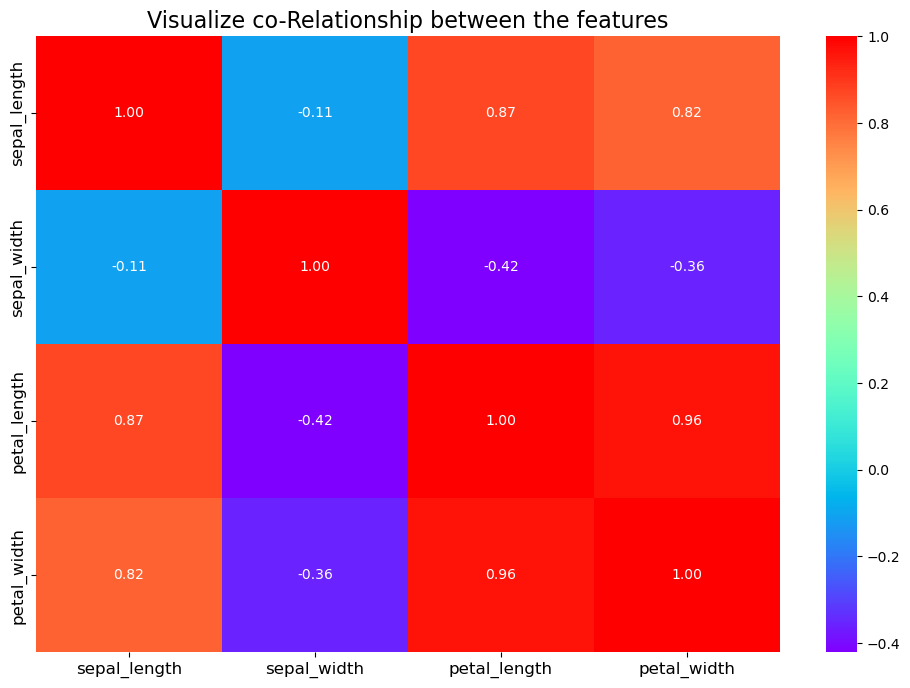

In [5]:
print(df.corr())
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Visualize co-Relationship between the features",fontsize=16)

In [6]:
x=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=10,splitter="best")
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [12]:
import pickle
pickle.dump(classifier,open('model','wb'))

In [14]:
model=pickle.load(open('model','rb'))
model

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [15]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

[Text(0.5, 0.9166666666666666, 'PetalLengthCm <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-setosa'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-virginica'),
 Text(0.5769230769230769, 0.75, 'PetalLengthCm <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-setosa'),
 Text(0.3076923076923077, 0.5833333333333334, 'SepalWidthCm <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalLengthCm <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalLengthCm <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\n

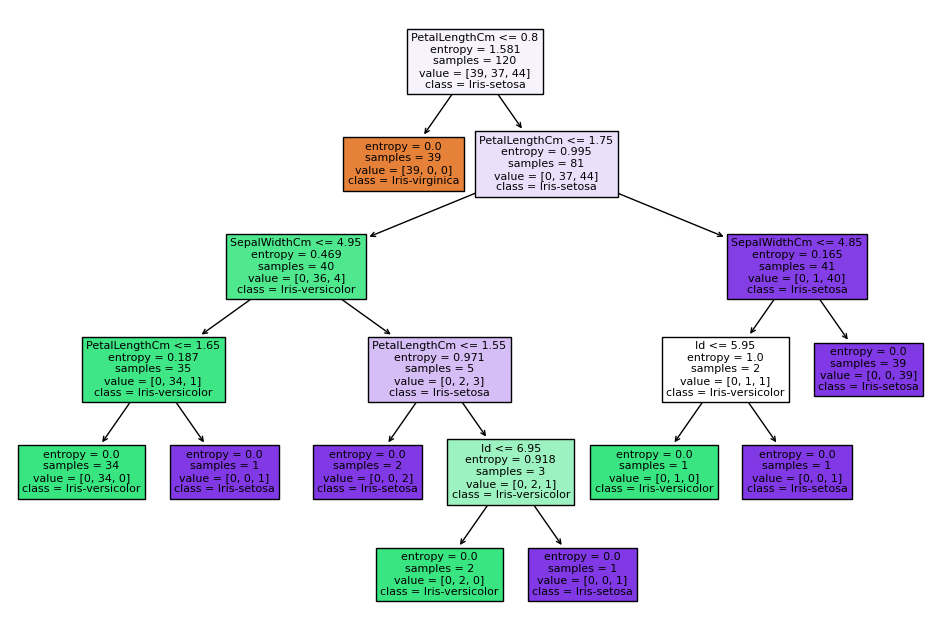

In [16]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True,impurity=True,feature_names=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'],
                class_names=['Iris-virginica','Iris-versicolor','Iris-setosa'])


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


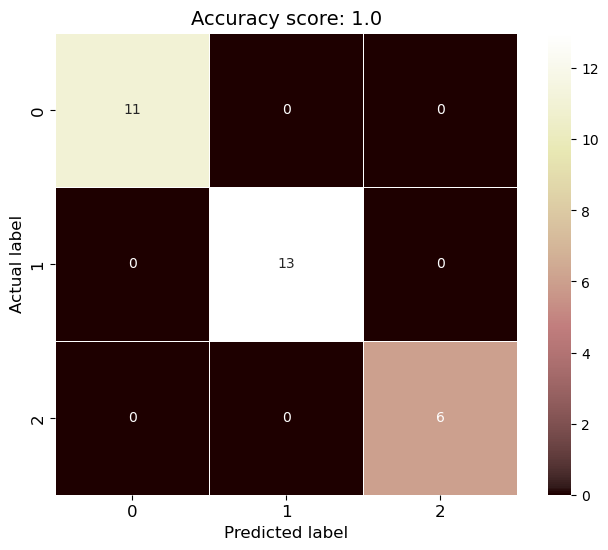

In [18]:
score=model.score(x,y)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt=".0f",linewidths=0.5,square=True,cmap='pink');
plt.ylabel('Actual label',fontsize=12);
plt.xlabel('Predicted label',fontsize=12);
plt.title('Accuracy score: {}'.format(score),size=14)
plt.tick_params(labelsize=12)

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy:  100.0 %


In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

